In [1]:
import numpy as np
import pandas as pd

In [9]:
train_df = pd.read_csv('train.csv')
holidays_events = pd.read_csv('holidays_events.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')

In [10]:
train_df.head()

#store_nbr: 제품이 판매되는 상점
#family: 판매되는 제품의 유형
#sales: 총 매출(분수값 가능)
#onpromotion : 특정 날짜에 매장에서 프로모션중인 제품군의 총 항목 수

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [25]:
train_df.isnull().sum() #결측값 없음

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [11]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [26]:
holidays_events.isnull().sum() #결측값 없음

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [12]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [27]:
stores.isnull().sum() #결측값 없음

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [14]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [29]:
transactions.isnull().sum() #결측값 없음

date            0
store_nbr       0
transactions    0
dtype: int64

In [13]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [33]:
oil.isnull().sum() #결측값 있음

date           0
dcoilwtico    43
dtype: int64

# 결측값 처리하기

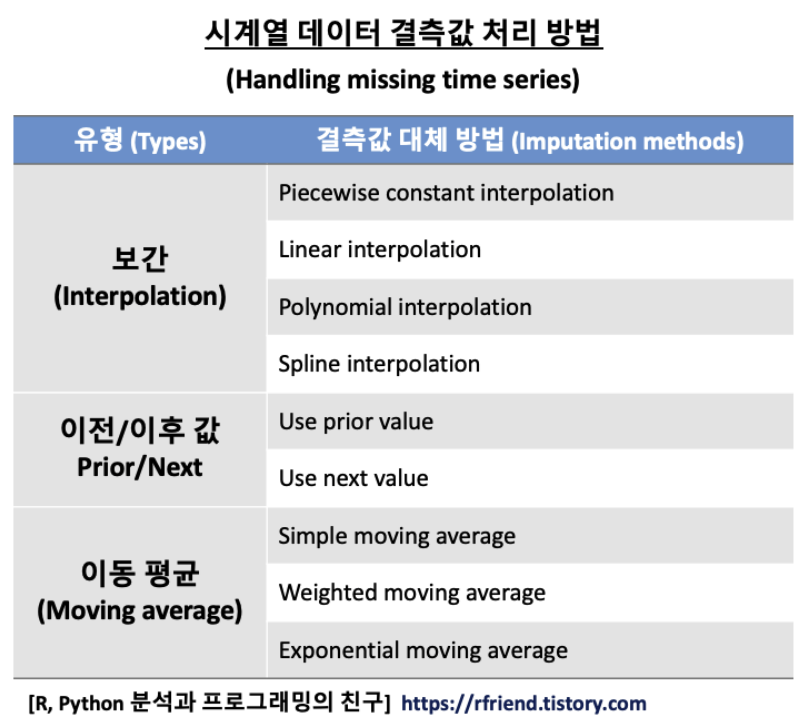

### 1. 결측값을 앞 방향 혹은 뒷 방향으로 채우기

In [42]:
forward_oil = oil.fillna(method='ffill') # Fill values forward
backward_oil =oil.fillna(method='bfill') # Fill values backward

In [43]:
forward_oil.isnull().sum() #결측값 1개

date          0
dcoilwtico    1
dtype: int64

In [45]:
backward_oil.isnull().sum() #결측값 x

date          0
dcoilwtico    0
dtype: int64

### 2. 결측값을 변수별 평균으로 대체하기

In [93]:
mean_oil = oil.fillna(oil.mean())    #oil.mean()=67.714366

In [94]:
mean_oil.isnull().sum() #결측값 x

date          0
dcoilwtico    0
dtype: int64

### 3. 보간법
이미 알려진 데이터 포인트들의 이산형 집합의 범위에 기반해서 새로운 데이터 포인트들을 만들거나 찾는 추정(estimation)의 한 유형

In [95]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime

In [96]:
# ts.interpolote() 는 default 가 interpolate(method='values')로서 선형으로 비례하여 결측값을 보간

ts_oil = oil.interpolate()

In [97]:
ts_oil.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

In [98]:
# 보간법으로 대체
ts_oil = oil.interpolate()
ts_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [99]:
# 이후값으로 대체
ts_backward_oil =ts_oil.fillna(method='bfill')
ts_backward_oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [104]:
ts_backward_oil.isnull().sum() #결측값 x

date          0
dcoilwtico    0
dtype: int64

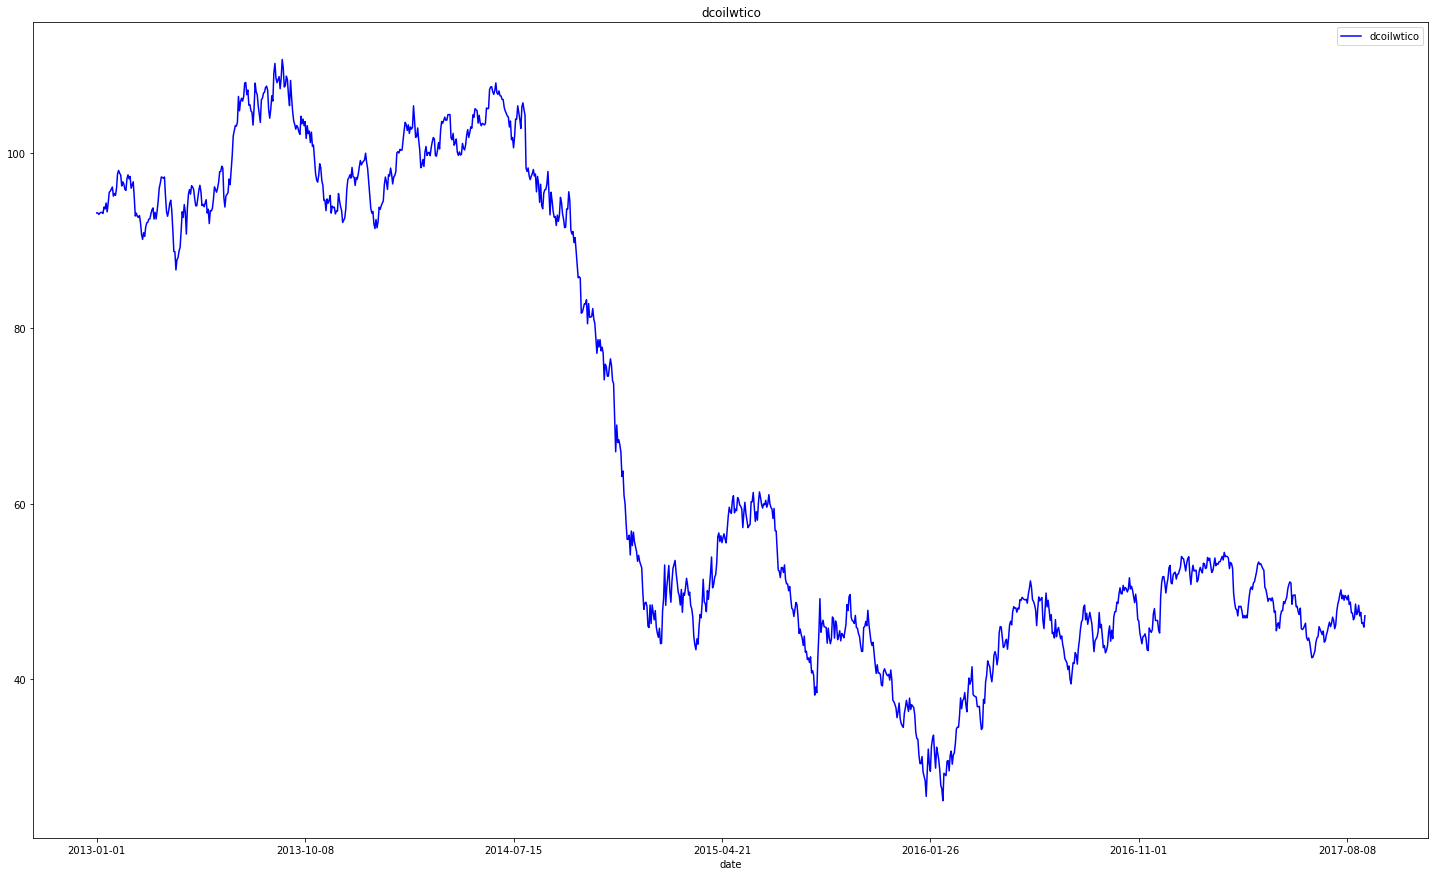

In [105]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,15))
ts_backward_oil.plot.line(x = "date", y = "dcoilwtico",color = 'b', title = "dcoilwtico", ax = axes, rot=0)
plt.show()

## -----------------------------------------------------------------------------------------------------------------------------------

In [205]:
# EDA (지난주와 동일)
# https://www.kaggle.com/yuxuanliu0626/eda-feature-engineering-model-error-analysis

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import sklearn
import optuna
from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess, Fourier
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [223]:
# read in files
holiday_df = pd.read_csv('holidays_events.csv')
oil_df = pd.read_csv('oil.csv')
store_df = pd.read_csv('stores.csv')
train_df = pd.read_csv('train.csv', dtype = {'store_nbr': 'category'})
test_df = pd.read_csv('test.csv', dtype = {'store_nbr': 'category'})

In [208]:
# overall sales trend
daily_sales_df = train_df[['date', 'sales']].groupby('date').mean().reset_index()
fig = go.Figure(data=go.Scatter(x=daily_sales_df['date'], 
                                y=daily_sales_df['sales'],
                                marker_color='red', text="sales"))
fig.show()

In [209]:
# extract date features
train_df['year'] = pd.to_datetime(train_df['date']).dt.year
train_df['month'] = pd.to_datetime(train_df['date']).dt.month
train_df['day'] = pd.to_datetime(train_df['date']).dt.day
train_df['day_of_week'] = pd.to_datetime(train_df['date']).dt.day_name()

# sales by month
by_month_df = train_df.groupby(['month'])['sales'].mean().reset_index()
fig = px.bar(by_month_df, x='month', y='sales', color='sales', color_continuous_scale="darkmint")
fig.show()

In [210]:
# sales by day of month
by_day_df = train_df.groupby(['day'])['sales'].mean().reset_index()
fig = go.Figure(data=go.Scatter(x=by_day_df['day'], 
                                y=by_day_df['sales'],
                                marker_color='red', text="sales"))
fig.show()

In [211]:
# sales by day of week
by_weekday_df = train_df.groupby(['day_of_week'])['sales'].mean()
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
by_weekday_df = by_weekday_df.reindex(new_order_week, axis=0).reset_index()
fig = px.bar(by_weekday_df, x='day_of_week', y='sales', color='sales', color_continuous_scale="darkmint")
fig.show()

In [212]:
# holiday sales
holiday_sales_df = pd.merge(daily_sales_df, holiday_df, on='date', how='inner')
fig = px.scatter(holiday_sales_df, x='date', y='sales', size='sales', color='type')
fig.show()

In [213]:
train_df.groupby('date')

In [214]:
# school and office supply sales trend
# This is the family that needs special attention
school_sales_df = train_df[train_df['family'] == 'SCHOOL AND OFFICE SUPPLIES']
daily_school_sales_df = school_sales_df.groupby(['date'])['sales'].mean().reset_index()
fig = go.Figure(data=go.Scatter(x=daily_school_sales_df['date'], 
                                y=daily_school_sales_df['sales'],
                                marker_color='red', text="sales"))
fig.show()
# peaks appear in April, Augest, and Sept

In [215]:
# store
store_sales_df = pd.merge(train_df, store_df, on='store_nbr', how='inner')
city_sales_df = store_sales_df.groupby(['city'])['sales'].mean().reset_index()
fig = px.bar(city_sales_df, x='city', y='sales', color = 'sales', color_continuous_scale="blues")
fig.show()

In [216]:
# oil_price trend
fig = go.Figure(data=go.Scatter(x=oil_df['date'], 
                                y=oil_df['dcoilwtico'],
                                marker_color='red', text="sales"))
fig.show()

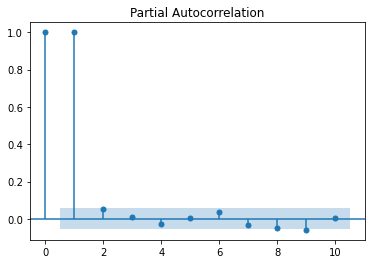

In [217]:
# autocorrelation of oil price
tmp_oil_df = oil_df.fillna(method = 'ffill')
_ = plot_pacf(tmp_oil_df[1:]['dcoilwtico'], lags = 10)

# Feature Engineering

In [283]:
# read in files
holiday_df = pd.read_csv('holidays_events.csv')
oil_df = pd.read_csv('oil.csv')
store_df = pd.read_csv('stores.csv')
train_df = pd.read_csv('train.csv', dtype = {'store_nbr': 'category'})
test_df = pd.read_csv('test.csv', dtype = {'store_nbr': 'category'})

In [284]:
holiday_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [285]:
# 간단하게 하기 위해 national holiday만 유지
holiday_df = holiday_df[holiday_df['locale'] == 'National']
holiday_df.drop(columns = ['locale', 'locale_name'], inplace = True)

In [286]:
# 중복 휴일 드롭, 평균 매출이 더 높은 휴일 남기기
# 중복된 값이 마지막에 나온 행만 남겨두고 삭제
tmp_df = pd.merge(holiday_df, train_df.groupby('date')['sales'].mean().reset_index(), on = 'date', how = 'left')
holiday_df = tmp_df.sort_values('sales').drop_duplicates(['date'], keep = 'last').drop(columns = ['sales', 'description'])
holiday_df.rename(columns = {'type': 'holiday_type'}, inplace = True)

In [287]:
# 시계열 객체로 변환
holiday_df['date'] = pd.to_datetime(holiday_df['date'])
holiday_df.set_index(['date'], inplace = True)

In [288]:
holiday_df

,holiday_type,transferred
date,,
2013-01-01,Holiday,False
2014-01-01,Holiday,False
2017-01-01,Holiday,True
2015-01-01,Holiday,False
2016-01-01,Holiday,False
...,...,...
2017-12-22,Additional,False
2017-12-23,Additional,False
2017-12-24,Additional,False


In [289]:
# 이름 변경
oil_df.rename(columns = {'dcoilwtico': 'oil_price'}, inplace = True)

# 최근 일주일 유가 가격
# rolling 메서드를 통해 위에서부터 7개의 데이터 묶음에 대해 mean( ) 메서드를 적용
oil_df['last7d_oil_price'] = oil_df['oil_price'].rolling(7).mean()

# 전날 가격으로 NULL 값 채우기
oil_df = pd.DataFrame({'date': pd.date_range('2013-01-01', '2017-08-31').astype(str)}).merge(oil_df, on = 'date', how = 'left')
oil_df.fillna(method = 'ffill', inplace = True)

In [290]:
# 지연 데이터 (lag)
# 이전 데이터를 현재 데이터에 넣으면 좀 더 정확한 학습 가능 
for lag in range(1, 4):
    oil_df[f'oil_price_lag{lag}'] = oil_df['oil_price'].shift(lag)
    oil_df[f'oil_price_lag{lag}'].fillna(oil_df['oil_price'], inplace = True)

# 시계열 객체로 변환
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df.set_index(['date'], inplace = True) 

In [291]:
oil_df

,oil_price,last7d_oil_price,oil_price_lag1,oil_price_lag2,oil_price_lag3
date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,93.14,NaN,93.14,93.14,93.14
2013-01-03,92.97,NaN,93.14,92.97,92.97
2013-01-04,93.12,NaN,92.97,93.14,93.12
2013-01-05,93.12,NaN,93.12,92.97,93.14
...,...,...,...,...,...
2017-08-27,47.65,47.720000,47.65,47.65,47.24
2017-08-28,46.40,47.624286,47.65,47.65,47.65
2017-08-29,46.46,47.320000,46.40,47.65,47.65


In [292]:
# 푸리에 변환
# 푸리에 변환은 연속적인 시계열 데이터를 sin, cos 함수들과 같은 파형들의 합으로 나타내는 것으로 여러 개의 주파수 성분들로 분해하는 작업
# 주로 신호 처리나 사운드, 이미지와 같은 데이터의 주파수 변환에 많이 사용

fourier = CalendarFourier(freq='W', order=4)  # 4개의 sin/cos 쌍

# 계절별 피쳐를 만들기
dp = DeterministicProcess(index=pd.date_range('2017-04-01', '2017-08-31'),
                          constant=False,
                          order=1,                 # trend (order 1 means linear)
                          seasonal=False,         # annual seasonality (fourier)
                          additional_terms=[fourier],
                          drop=True)
dp_df = dp.in_sample()

for i in range(1,4):
    dp_df.rename(columns = {f'sin({i},freq=W-SUN)': f'sin{i}'}, inplace = True)
    dp_df.rename(columns = {f'cos({i},freq=W-SUN)': f'cos{i}'}, inplace = True)

In [293]:
dp_df

,trend,sin1,cos1,sin2,cos2,sin3,cos3
2017-04-01,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490
2017-04-02,2.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969
2017-04-03,3.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-04-04,4.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
2017-04-05,5.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
...,...,...,...,...,...,...,...
2017-08-27,149.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969
2017-08-28,150.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-08-29,151.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
2017-08-30,152.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490


In [294]:
# 모든 데이터셋 병합
# 인덱스를 기준열로 사용하려면 left_index 또는 right_index 인수를 True 로 설정

df = pd.DataFrame(index = pd.date_range('2017-04-01', '2017-08-31')) # training start from 2017-04-01
merged_df = df.merge(holiday_df, left_index = True, right_index = True, how = 'left')
merged_df = merged_df.merge(oil_df, left_index = True, right_index = True, how = 'left')
merged_df = merged_df.merge(dp_df, left_index = True, right_index = True, how = 'left')
merged_df['transferred'].fillna(False, inplace = True)

In [296]:
# 시계열 객체로 변환

# 월
merged_df['month'] = pd.to_datetime(merged_df.index).month
# 일
merged_df['day'] = pd.to_datetime(merged_df.index).day
# 요일
merged_df['day_of_week'] = pd.to_datetime(merged_df.index).day_name()
# 3,4,8,9월이면 1
merged_df['is_school_day'] = (pd.to_datetime(merged_df.index).month.isin([3, 4, 8, 9])).astype(int)

In [297]:
merged_df

,holiday_type,transferred,oil_price,last7d_oil_price,oil_price_lag1,oil_price_lag2,oil_price_lag3,trend,sin1,cos1,sin2,cos2,sin3,cos3,month,day,day_of_week,is_school_day
2017-04-01,NaN,False,50.54,48.570000,50.54,50.30,49.47,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,4,1,Saturday,1
2017-04-02,NaN,False,50.54,48.570000,50.54,50.54,50.30,2.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,4,2,Sunday,1
2017-04-03,NaN,False,50.25,49.034286,50.54,50.54,50.54,3.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4,3,Monday,1
2017-04-04,NaN,False,50.99,49.561429,50.25,50.54,50.54,4.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,4,4,Tuesday,1
2017-04-05,NaN,False,51.14,50.150000,50.99,50.25,50.54,5.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,4,5,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-27,NaN,False,47.65,47.720000,47.65,47.65,47.24,149.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,8,27,Sunday,1
2017-08-28,NaN,False,46.40,47.624286,47.65,47.65,47.65,150.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8,28,Monday,1
2017-08-29,NaN,False,46.46,47.320000,46.40,47.65,47.65,151.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,8,29,Tuesday,1
2017-08-30,NaN,False,45.96,47.115714,46.46,46.40,47.65,152.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,8,30,Wednesday,1


In [298]:
# if is workday
merged_df['is_workday'] = 1
# 토요알, 일요일은 is_workday를 0으로 설정
merged_df.loc[merged_df['day_of_week'].isin(['Saturday', 'Sunday']), 'is_workday'] = 0

# 휴일 타입에 따라 0과 1로 구분
merged_df.loc[merged_df['holiday_type'] == 'Bridge', 'is_workday'] = 0
merged_df.loc[merged_df['holiday_type'] == 'Work Day', 'is_workday'] = 1
merged_df.loc[merged_df['holiday_type'] == 'Transfer', 'is_workday'] = 0
merged_df.loc[(merged_df['holiday_type'] == 'Holiday') & (merged_df['transferred'] == False), 'is_workday'] = 0
merged_df.loc[(merged_df['holiday_type'] == 'Holiday') & (merged_df['transferred'] == True ), 'is_workday'] = 1
merged_df.drop(columns = ['transferred'], inplace = True)

# 가변수 만들기 (더미 변수)
merged_df = pd.get_dummies(merged_df, columns = ['holiday_type', 'day_of_week'])
merged_df.drop(columns = ['day_of_week_Monday'],inplace = True)

In [299]:
merged_df

,oil_price,last7d_oil_price,oil_price_lag1,oil_price_lag2,oil_price_lag3,trend,sin1,cos1,sin2,cos2,sin3,cos3,month,day,is_school_day,is_workday,holiday_type_Additional,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
2017-04-01,50.54,48.570000,50.54,50.30,49.47,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,4,1,1,0,0,0,0,0,0,1,0,0,0,0
2017-04-02,50.54,48.570000,50.54,50.54,50.30,2.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,4,2,1,0,0,0,0,0,0,0,1,0,0,0
2017-04-03,50.25,49.034286,50.54,50.54,50.54,3.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4,3,1,1,0,0,0,0,0,0,0,0,0,0
2017-04-04,50.99,49.561429,50.25,50.54,50.54,4.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,4,4,1,1,0,0,0,0,0,0,0,0,1,0
2017-04-05,51.14,50.150000,50.99,50.25,50.54,5.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,4,5,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-27,47.65,47.720000,47.65,47.65,47.24,149.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,8,27,1,0,0,0,0,0,0,0,1,0,0,0
2017-08-28,46.40,47.624286,47.65,47.65,47.65,150.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8,28,1,1,0,0,0,0,0,0,0,0,0,0
2017-08-29,46.46,47.320000,46.40,47.65,47.65,151.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,8,29,1,1,0,0,0,0,0,0,0,0,1,0
2017-08-30,45.96,47.115714,46.46,46.40,47.65,152.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,8,30,1,1,0,0,0,0,0,0,0,0,0,1


# Modelling

In [300]:
train_date = ['2017-04-01', '2017-07-31'] # training date range
valid_date = ['2017-08-01', '2017-08-15'] # validation date range
test_date = ['2017-08-16', '2017-08-31'] # test date range

In [301]:
# 위 날짜로 train, validation, and test 분할
X_train = merged_df[train_date[0]:train_date[1]]
X_valid = merged_df[valid_date[0]:valid_date[1]]
X_test = merged_df[test_date[0]:test_date[1]]

# .set_index 인덱스 설정
# .unstack 행의 인덱스를 컬럼으로 보냄
y = train_df[['store_nbr', 'family', 'date', 'sales']].set_index(['store_nbr', 'family', 'date']).sort_index().unstack(['store_nbr', 'family'])
y_train = y[train_date[0]:train_date[1]]
y_valid = y[valid_date[0]:valid_date[1]]

## Ridge + RF

In [302]:
# school and office supplies 에는 랜덤 포레스트 사용
# 나머지는 릿지 회귀분석 사용

class CustomRegressor():
    
    def __init__(self, n_jobs=-1, verbose=0):
        
        self.n_jobs = n_jobs
        self.verbose = verbose
        self.estimators_ = None
        
    def _estimator_(self, X, y):
    
        warnings.simplefilter(action='ignore', category=FutureWarning)
        if y.name[2] == 'SCHOOL AND OFFICE SUPPLIES':  
            model = RandomForestRegressor(n_estimators = 225, n_jobs = -1) 
        else:  
            model = Ridge(fit_intercept=True, solver='auto', alpha=0.5, normalize=True)    
        model.fit(X, y)
        return model

    def fit(self, X, y):

        self.estimators_ = Parallel(n_jobs=self.n_jobs, 
                              verbose=self.verbose,
                              )(delayed(self._estimator_)(X, y.iloc[:, i]) for i in range(y.shape[1]))
        return
    
    def predict(self, X):
        
        y_pred = Parallel(n_jobs=self.n_jobs, 
                          verbose=self.verbose)(delayed(e.predict)(X) for e in self.estimators_)
        return np.stack(y_pred, axis=1)

In [303]:
# ridge + rf

model = CustomRegressor()
model.fit(X_train, y_train)

# .stack 컬럼의 정보를 행에다 쌓기
pred_df = pd.DataFrame(model.predict(X_valid),columns = y_train.columns, index = X_valid.index).stack(['store_nbr', 'family'])

In [304]:
# 유효성 검사 점수

# 입력 임계값에서 값을 자름
# 최소 임계값=0 (0 아래의 모든 값은 0으로 설정)
pred_df['sales'].clip(lower = 0, inplace = True)

# 가장 마지막에 삽입된 데이터가 가장 먼저 사용되거나 삭제
pred_df['true_sales'] = y_valid.stack(['store_nbr', 'family']).values

# 성능지표 MSLE - MSE에 로그를 적용해준 지표
# mean_squared_log_error(y_test, y_pred)
print(mean_squared_log_error(pred_df['true_sales'], pred_df['sales']))

# DataFrame명.apply(lambda x : x['칼럼명']들의 조건식
pred_df.groupby('family').apply(lambda r: mean_squared_log_error(r['sales'], r['true_sales']))

0.2382444500736234


family
AUTOMOTIVE                    0.308114
BABY CARE                     0.100612
BEAUTY                        0.384761
BEVERAGES                     0.070934
BOOKS                         0.019988
BREAD/BAKERY                  0.041758
CELEBRATION                   0.344112
CLEANING                      0.154260
DAIRY                         0.039586
DELI                          0.048173
EGGS                          0.110211
FROZEN FOODS                  0.087577
GROCERY I                     0.050237
GROCERY II                    0.456391
HARDWARE                      0.333958
HOME AND KITCHEN I            0.263666
HOME AND KITCHEN II           0.273673
HOME APPLIANCES               0.161031
HOME CARE                     0.091643
LADIESWEAR                    0.314233
LAWN AND GARDEN               0.238669
LINGERIE                      0.501379
LIQUOR,WINE,BEER              0.302535
MAGAZINES                     0.295259
MEATS                         0.054179
PERSONAL CARE     